In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, special

https://stackoverflow.com/questions/77687108/scipy-minimize-how-to-calculate-supremum-with-an-epsilon

In [2]:
def p(r, alpha=10., sigma=np.sqrt(2.), r0=200):  
    return 0.5 - 0.5 * special.erf(0.5 * (alpha / sigma) * np.log10(r / r0))

In [73]:
def model(x):
    # x = (epsilon, r)
    return - x[0] * np.power(x[1], 2.)

In [87]:
def jacobian(x):
    return np.array([
        -1. * np.power(x[1], 2.),
        -2. * x[0] * x[1]
    ])

In [88]:
def constraint(x):
    # x = (epsilon, r)
    return p(x[1]) - x[0]

In [89]:
nlc = optimize.NonlinearConstraint(constraint, 0., np.inf)

In [104]:
solution = optimize.minimize(
    model, x0=[0., 1.],
    bounds=[(0., 1.), (0., np.inf)],
    constraints=[nlc],
    #jac=jacobian,
    #method='SLSQP'
)
solution

     fun: -19694.23466311135
     jac: array([-46597.57519531,   -182.46826172])
 message: 'Optimization terminated successfully'
    nfev: 31
     nit: 14
    njev: 10
  status: 0
 success: True
       x: array([  0.42264505, 215.86471535])

In [95]:
supremum = - solution.fun
supremum

19694.23466311135

In [96]:
model([0.3, 250])

-18750.0

In [97]:
p(250)

0.3139977712243768

In [98]:
rlin = np.linspace(1e-18, 600, 200)
plin = p(rlin)

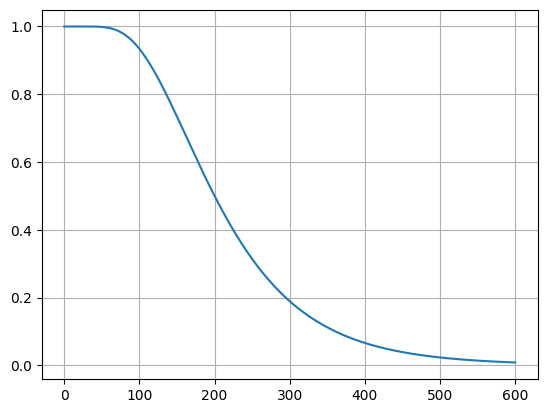

In [99]:
fig, axe = plt.subplots()
axe.plot(rlin, plin)
axe.grid()

In [100]:
elin = np.linspace(0, 1, 200)
rlin = np.linspace(0, 400, 200)
E, R = np.meshgrid(elin, rlin)

In [101]:
F = model((E, R))
C = constraint((E, R))

/tmp/ipykernel_5594/905356399.py:2: RuntimeWarning: divide by zero encountered in log10
  return 0.5 - 0.5 * special.erf(0.5 * (alpha / sigma) * np.log10(r / r0))


/tmp/ipykernel_5594/905356399.py:2: RuntimeWarning: divide by zero encountered in log10
  return 0.5 - 0.5 * special.erf(0.5 * (alpha / sigma) * np.log10(r / r0))


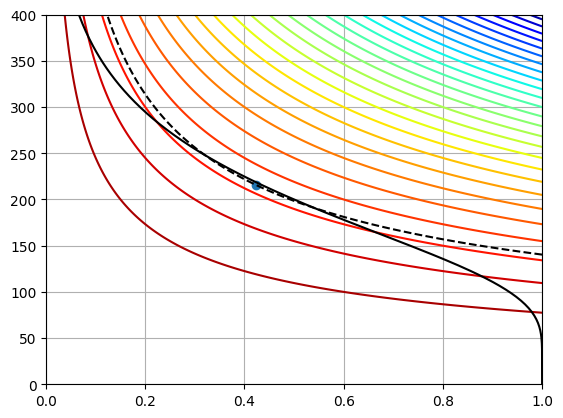

In [105]:
fig, axe = plt.subplots()
axe.contour(E, R, F, 30, cmap="jet")
axe.contour(E, R, F, [solution.fun], colors="black")
axe.plot(p(rlin), rlin, color="black")
axe.scatter(*solution.x)
axe.grid()